> ***Sometimes the questions are complicated and the answers are simple ***

>*Dr. Seuss*

## Coin Toss

You toss a coin 30 times and see head 24 times. Is it a fair coin?

**Hypothesis 1**: Tossing a fair coin will get you 15 heads in 30 tosses. This coin is biased

**Hypothesis 2**: Come on, even a fair coin could show 24 heads in 30 tosses. This is just by chance

#### Statistical Method

P(H) = ? 

P(HH) = ?

P(THH) = ?

Now, slightly tougher : P(2H, 1T) = ?

Generalizing, 

<img style="float: left;" src="img/binomial.gif">

<br>
<br>
<br>
<br>


**What is the probability of getting 24 heads in 30 tosses ?**

It is the probability of getting heads 24 times or more. 

#### Hacker's Approach

Simulation. Run the experiment 100,000 times. Find the percentage of times the experiment returned 24 or more heads. If it is less than 5%, we conclude that the coin is biased. 

In [39]:
import numpy as np  

In [40]:
total_tosses = 30
num_heads = 24
prob_head = 0.5

In [41]:
#0 is tail. 1 is heads. Generate one experiment
experiment = np.random.randint(0,2,total_tosses)

In [42]:
print("Data for the Experiment:", experiment)

Data for the Experiment: [1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0]


In [43]:
#Find the number of heads
print("Heads in the Experiment:", experiment[experiment==1])  #This will give all the heads in the array

Heads in the Experiment: [1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [44]:
head_count = experiment[experiment==1].shape[0] #This will get the count of heads in the array
print("Number of heads in the experiment:", head_count)

Number of heads in the experiment: 14


In [45]:
#Now, the above experiment needs to be repeated 100 times. Let's write a function and put the above code in a loop

def coin_toss_experiment(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    
    for times in np.arange(times_to_repeat):
        experiment = np.random.randint(0,2,total_tosses)
        head_count[times] = experiment[experiment==1].shape[0]
    
    return head_count

In [46]:
head_count = coin_toss_experiment(100)

In [47]:
head_count[:10] 

array([[14],
       [ 9],
       [12],
       [13],
       [16],
       [16],
       [18],
       [18],
       [16],
       [12]])

In [48]:
print("Dimensions:", head_count.shape, "\n","Type of object:", type(head_count))

Dimensions: (100, 1) 
 Type of object: <class 'numpy.ndarray'>


In [49]:
#Let's plot the above distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)

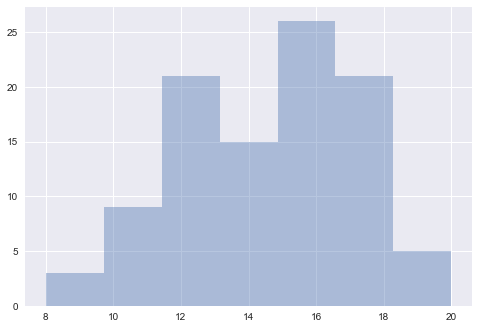

In [50]:
sns.distplot(head_count, kde=False)

**Exercise**: Try setting `kde=True` in the above cell and observe what happens

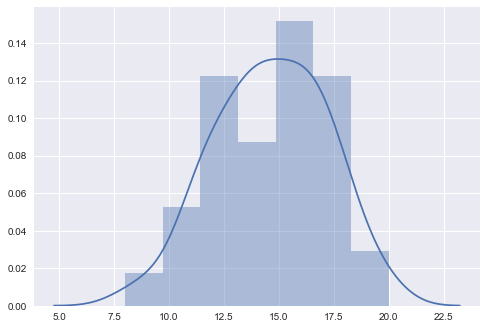

In [51]:
sns.distplot(head_count, kde=True)

In [52]:
#Number of times the experiment returned 24 heads.
head_count[head_count>=24]

array([], dtype=int32)

In [53]:
print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 24 heads or more: 0
% of times with 24 or more heads:  0.0


####  Exercise: Repeat the experiment 100,000 times. 

In [54]:
head_count = coin_toss_experiment(100000)

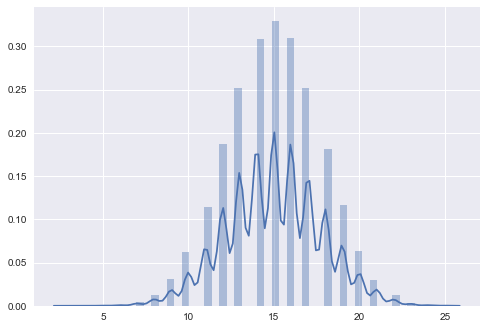

In [55]:
sns.distplot(head_count, kde=True)

In [56]:
#Number of times the experiment returned 24 heads.
head_count[head_count>=24]

array([24, 24, 24, 24, 24, 24, 24, 24, 24, 25, 25, 24, 24, 25, 24, 24, 25,
       24, 24, 24, 24, 25, 24, 25, 24, 24, 24, 25, 24, 24, 24, 24, 24, 24,
       25, 24, 24, 24, 24, 24, 24, 24, 25, 24, 24, 25, 24, 24, 25, 24, 24,
       24, 25, 24, 25, 25, 24, 25, 24, 24, 24, 25, 24, 24, 24, 24, 24, 24,
       25, 24])

In [57]:
print("No of times experiment returned 24 heads or more:", head_count[head_count>=24].shape[0])
print("% of times with 24 or more heads: ", head_count[head_count>=24].shape[0]/float(head_count.shape[0])*100)

No of times experiment returned 24 heads or more: 70
% of times with 24 or more heads:  0.06999999999999999


# Is the coin fair?

In [58]:
# Type your answer and reasons here

### Extra pointers on numpy

**** Removing `for` loop in the funciton ****

In [30]:
def coin_toss_experiment_2(times_to_repeat):

    head_count = np.empty([times_to_repeat,1], dtype=int)
    experiment = np.random.randint(0,2,[times_to_repeat,total_tosses])
    return experiment.sum(axis=1)

#### Exercise: Benchmark `coin_toss_experiment` and `coin_toss_experiment_2` for 100 and 100,000 runs and report improvements, if any

In [31]:
coin_toss_experiment_2(10)

array([18, 11, 12, 17, 18, 14, 13, 15, 11, 12])

## Exercise

Build a similar simulation to check for distribution across dice rolls